In [3]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = "F:/NeU 2nd Sem/ADM/Assignment 2"
csv_pattern = os.path.join(path, "*.csv")
file_list = glob.glob(csv_pattern)

print("Created dataframe names: ")
for file in file_list:
    
    vars()[os.path.basename(file)[:-4]] = pd.read_csv(file)
    print(os.path.basename(file)[:-4])
    

Created dataframe names: 
campaign_data
coupon_item_mapping
customer_demographics
customer_demographics_new
customer_transaction_data
final_train
item_data
smote
test
train


## Train.csv

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [5]:
train.head(10)

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
5,11,11,795,793,0
6,14,9,444,590,0
7,15,29,538,368,0
8,17,30,857,523,0
9,19,2,559,679,0


In [6]:
train.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [30]:
train.isnull().sum()
df1 = pd.DataFrame(zip(train.campaign_id, train.coupon_id), columns=("campaign_id","coupon_id"))
print(df1.head(10))
df1.shape

   campaign_id  coupon_id
0           13         27
1           13        116
2            9        635
3           13        644
4            8       1017
5           11        795
6            9        444
7           29        538
8           30        857
9            2        559


(78369, 2)

In [8]:
print(train.campaign_id.nunique())
train.campaign_id.value_counts()

18


13    22606
8     22555
30     6467
26     6056
29     3895
9      3168
11     2782
12     2550
5      1827
10     1723
7      1584
4       972
2       768
28      476
3       408
27      324
1       143
6        65
Name: campaign_id, dtype: int64

In [9]:
train.redemption_status.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [81]:
t = train["train_id"].groupby([train["campaign_id"], train["redemption_status"]]).count()
t

campaign_id  redemption_status
1            0                      142
             1                        1
2            0                      763
             1                        5
3            0                      406
             1                        2
4            0                      965
             1                        7
5            0                     1820
             1                        7
6            0                       64
             1                        1
7            0                     1580
             1                        4
8            0                    22356
             1                      199
9            0                     3145
             1                       23
10           0                     1716
             1                        7
11           0                     2776
             1                        6
12           0                     2538
             1                       12
13       

In [85]:
coup = train["coupon_id"].groupby([train.coupon_id, train.redemption_status]).count()
coup

coupon_id  redemption_status
1          0                     31
2          0                     40
3          0                    118
4          0                     32
5          0                     36
6          0                    106
           1                     10
7          0                    107
8          0                    108
           1                      7
9          0                    106
           1                     14
10         0                    109
11         0                    130
12         0                    113
13         0                    112
14         0                     97
           1                      1
15         0                    123
16         0                     81
17         0                    198
18         0                    175
           1                      1
19         0                    176
20         0                     95
           1                      4
21         0                    122

In [99]:
train[train.redemption_status==1].coupon_id.value_counts()

754     36
705     20
468     19
586     18
786     16
942     16
9       14
661     14
672     14
21      14
1059    13
982     13
960     12
22      11
773     11
578     10
6       10
689      9
1065     8
625      8
726      7
454      7
8        7
1002     7
601      6
530      6
465      6
796      6
885      6
529      6
        ..
552      1
536      1
844      1
455      1
667      1
460      1
821      1
817      1
813      1
475      1
480      1
481      1
485      1
805      1
800      1
496      1
504      1
508      1
509      1
793      1
790      1
787      1
514      1
522      1
525      1
776      1
528      1
531      1
763      1
1023     1
Name: coupon_id, Length: 239, dtype: int64

In [139]:
coupon_item_mapping[coupon_item_mapping.coupon_id.isin(train[(train.coupon_id==754) & (train.redemption_status==1)].coupon_id.values)].head()



,coupon_id,item_id
13248,754,70460
13249,754,70506
13250,754,20849
13251,754,15666
13252,754,29858


In [145]:
customer_transaction_data[customer_transaction_data["coupon_discount"] !=0].item_id.value_counts().head(10)
#customer_transaction_data

45502    187
45539    117
53521     74
53517     69
45578     61
5984      58
22631     57
14764     56
45527     50
28289     49
Name: item_id, dtype: int64

In [166]:
customer_transaction_data.shape

(1324566, 7)

In [186]:
cust_dtl_trans = pd.merge(customer_transaction_data, customer_demographics, how="left", on="customer_id")
#customer_transaction_data.customer_id.value_counts().head()
cust_dtl_trans.isnull().sum()

print(cust_dtl_trans.shape)
cust_dtl_trans.head()
print(cust_dtl_trans.customer_id.value_counts().head())
cust_dtl_trans[cust_dtl_trans.customer_id == 1555].head()

(1324566, 13)
1555    4522
711     4173
464     4134
1475    3945
1011    3862
Name: customer_id, dtype: int64


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
15684,2012-02-05,1555,5255,1,106.50,-14.25,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15685,2012-02-05,1555,5262,1,31.70,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15686,2012-02-05,1555,6213,1,70.88,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15687,2012-02-05,1555,7057,1,60.20,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15688,2012-02-05,1555,8049,2,426.73,-284.96,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
cust_itm_details = pd.merge(cust_dtl_trans, item_data,on="item_id")
cust_itm_details[cust_itm_details.customer_id==1555].head()


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category
244,2012-05-18,1555,54253,1,61.98,-5.34,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56,Local,Natural Products
304,2012-08-25,1555,54253,1,67.32,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56,Local,Natural Products
1012,2012-02-17,1555,19560,1,49.51,-5.34,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56,Local,Grocery
1562,2012-11-12,1555,27801,1,35.62,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1235,Established,Grocery
1579,2012-11-26,1555,27801,1,35.62,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1235,Established,Grocery


In [194]:
cust_itm_details[cust_itm_details.customer_id==1555].category.value_counts()

Grocery                   3233
Pharmaceutical             517
Packaged Meat              208
Natural Products           140
Dairy, Juices & Snacks      93
Fuel                        92
Bakery                      72
Prepared Food               63
Meat                        46
Seafood                     26
Flowers & Plants            11
Miscellaneous               11
Skin & Hair Care             6
Garden                       2
Salads                       1
Restauarant                  1
Name: category, dtype: int64

Grocery             942176
Pharmaceutical      155245
Packaged Meat        66110
Natural Products     52981
Meat                 23056
Name: category, dtype: int64
Index(['Grocery', 'Pharmaceutical', 'Packaged Meat', 'Natural Products',
       'Meat'],
      dtype='object')


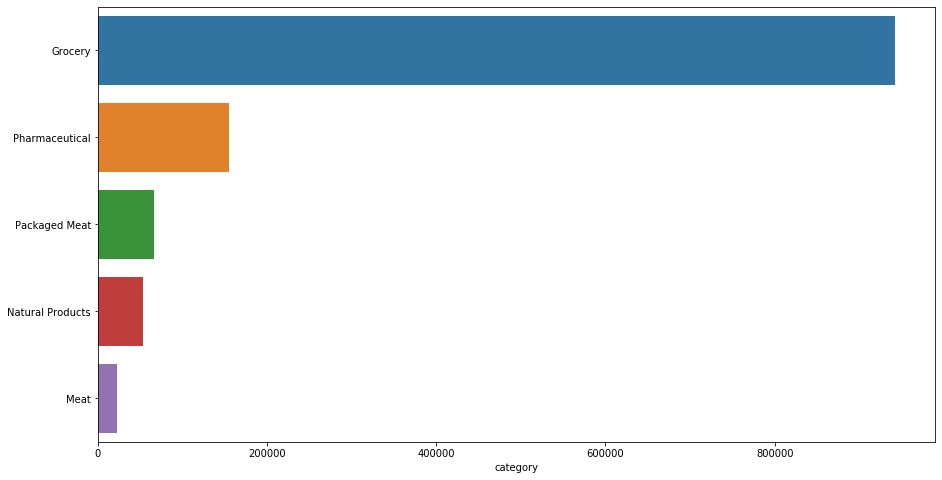

In [213]:
print(cust_itm_details.category.value_counts()[:5])
print(cust_itm_details.category.value_counts()[:5].index)
plt.figure(figsize=(15,8))
sns.barplot(y=cust_itm_details.category.value_counts()[:5].index, x= cust_itm_details.category.value_counts()[:5])

In [196]:
item_data[(item_data.brand==56) & (item_data.brand_type=='Local') & (item_data.category=='Grocery')]

,item_id,brand,brand_type,category
3,4,56,Local,Grocery
4,5,56,Local,Grocery
5,6,56,Local,Grocery
9,10,56,Local,Grocery
11,12,56,Local,Grocery
13,14,56,Local,Grocery
14,15,56,Local,Grocery
15,16,56,Local,Grocery
16,17,56,Local,Grocery
17,18,56,Local,Grocery


In [138]:
#coupon_item_mapping[coupon_item_mapping.coupon_id.isin(train[(train.coupon_id==754) & (train.redemption_status==1)].coupon_id.values)].item_id
customer_transaction_data[customer_transaction_data.item_id.isin(coupon_item_mapping[coupon_item_mapping.coupon_id.isin(train[(train.coupon_id==754) & (train.redemption_status==1)].coupon_id.values)].item_id.values)]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
2710,2012-01-12,1458,5953,1,177.74,-14.25,0.00
5070,2012-01-18,871,34817,1,142.12,-49.87,0.00
7115,2012-01-22,1396,12392,1,177.74,-14.25,0.00
8271,2012-01-25,1157,27164,1,177.74,-14.25,0.00
9537,2012-01-26,1458,5953,1,177.74,-14.25,0.00
13670,2012-02-03,1032,5608,1,177.74,-7.12,0.00
17394,2012-02-07,760,57563,1,177.74,-14.25,0.00
17877,2012-02-08,859,31451,1,177.74,-14.25,0.00
19850,2012-02-10,705,20034,1,177.74,-14.25,0.00
21150,2012-02-12,1212,48854,1,142.12,-49.87,-35.62


In [ ]:
total = train.redemption_status.value_counts()
total = total.reset_index()
total.columns = ["Redemption_Status", "Count"]

percent = train.redemption_status.value_counts() / len(train.iloc[:,0]) * 100
total["Percent"] = percent
print(total)

In [11]:
len(train.iloc[:,1])

78369

In [12]:
train.rename(columns={"id": "train_id"}, inplace=True)
train.head(10)

,train_id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
5,11,11,795,793,0
6,14,9,444,590,0
7,15,29,538,368,0
8,17,30,857,523,0
9,19,2,559,679,0


## Campaign_data.csv

In [13]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


In [14]:
campaign_data.head(10)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [15]:
ser = pd.Series(campaign_data.campaign_id.unique())
ser.sort_values()


21     1
22     2
18     3
20     4
19     5
17     6
16     7
15     8
14     9
13    10
11    11
12    12
10    13
9     16
8     17
6     18
7     19
2     20
4     21
5     22
3     23
0     24
1     25
27    26
26    27
25    28
24    29
23    30
dtype: int64

In [16]:
train_Campaign = pd.merge(train, campaign_data, on="campaign_id")
print(train_Campaign.shape)
train_Campaign.head()

(78369, 8)


,train_id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,7,13,644,1050,0,X,19/05/13,05/07/13
3,21,13,1028,89,0,X,19/05/13,05/07/13
4,23,13,517,1067,0,X,19/05/13,05/07/13


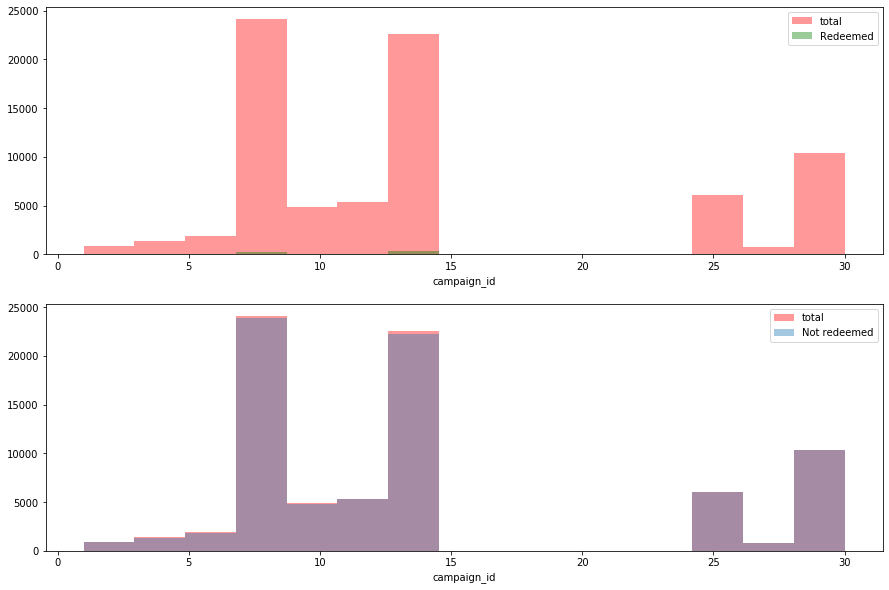

In [88]:
#plt.scatter(train_Campaign.coupon_id, train_Campaign.redemption_status)
fig, axes = plt.subplots(2, 1, figsize=(15,10))
ax = sns.distplot(train_Campaign.campaign_id, bins=15, ax = axes[0],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 1].campaign_id, bins=15, ax = axes[0],  label="Redeemed", kde=False,color = "green")
ax.legend()

ax = sns.distplot(train_Campaign.campaign_id, bins=15, ax = axes[1],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 0].campaign_id, bins=15, ax = axes[1],  label="Not redeemed", kde=False)
ax.legend()

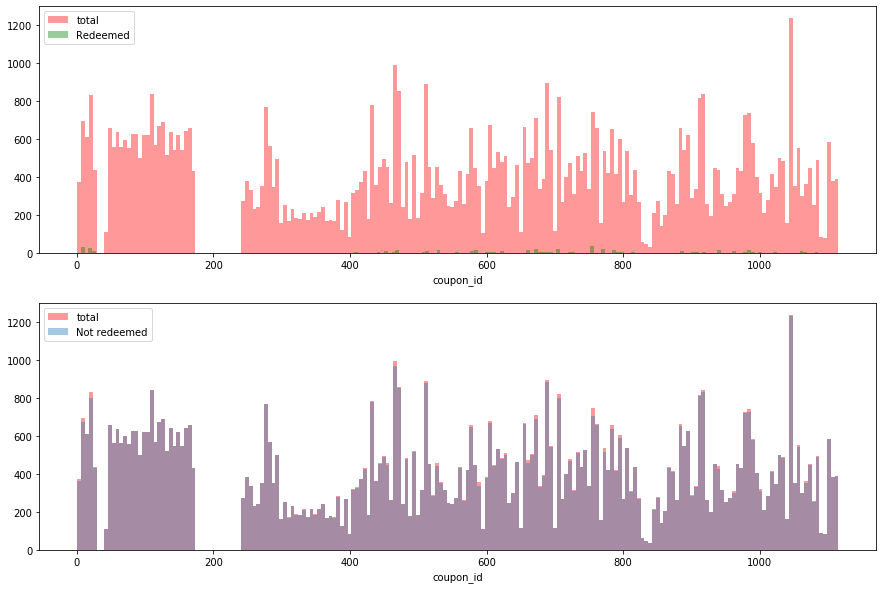

In [95]:
#plt.scatter(train_Campaign.coupon_id, train_Campaign.redemption_status)
fig, axes = plt.subplots(2, 1, figsize=(15,10))
ax = sns.distplot(train_Campaign.coupon_id, bins=200, ax = axes[0],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 1].coupon_id, bins=200, ax = axes[0],  label="Redeemed", kde=False,color = "green")
ax.legend()

ax = sns.distplot(train_Campaign.coupon_id, bins=200, ax = axes[1],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 0].coupon_id, bins=200, ax = axes[1],  label="Not redeemed", kde=False)
ax.legend()

In [ ]:
train_Campaign_CustDemo = pd.merge(train_Campaign, customer_demographics)

## coupon_item_mapping

In [17]:
coupon_item_mapping.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


In [18]:
coupon_item_mapping.head(10)

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
5,520,77
6,529,77
7,524,77
8,522,81
9,518,81


In [19]:
train_CouponItemMapping = pd.merge(train_Campaign, coupon_item_mapping, on="coupon_id")

In [20]:
print(train_CouponItemMapping.shape)
train_CouponItemMapping[train_CouponItemMapping.redemption_status==1]

(6420694, 9)


,train_id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,item_id
12625,108935,13,27,295,1,X,19/05/13,05/07/13,24775
12626,108935,13,27,295,1,X,19/05/13,05/07/13,14958
12627,108935,13,27,295,1,X,19/05/13,05/07/13,40431
12628,108935,13,27,295,1,X,19/05/13,05/07/13,20749
12629,108935,13,27,295,1,X,19/05/13,05/07/13,56860
12630,108935,13,27,295,1,X,19/05/13,05/07/13,58066
12631,108935,13,27,295,1,X,19/05/13,05/07/13,56921
12632,108935,13,27,295,1,X,19/05/13,05/07/13,56955
12633,108935,13,27,295,1,X,19/05/13,05/07/13,58068
12634,108935,13,27,295,1,X,19/05/13,05/07/13,56907


In [79]:
customer_transaction_data.shape

(1324566, 7)

## customer_demographics

In [153]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [154]:
print(customer_demographics["no_of_children"].value_counts())

1     107
3+     60
2      55
Name: no_of_children, dtype: int64


In [155]:
customer_demographics["no_of_children"].fillna(0, inplace=True)

In [156]:
customer_demographics[(customer_demographics["no_of_children"]!=0) & customer_demographics.marital_status.isnull()].fillna("Married", inplace=True)

C:\Users\Win10\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [157]:
customer_demographics[(customer_demographics["no_of_children"]!=0) & customer_demographics.marital_status.isnull()] = customer_demographics[(customer_demographics["no_of_children"]!=0) & customer_demographics.marital_status.isnull()].fillna("Married")

In [158]:
customer_demographics[(customer_demographics["no_of_children"]==0) & (customer_demographics.marital_status.isnull())]["family_size"].value_counts()


1    183
2     89
Name: family_size, dtype: int64

In [159]:
customer_demographics[(customer_demographics["no_of_children"]==0) & (customer_demographics.marital_status.isnull()) & (customer_demographics["family_size"] == "2")] = customer_demographics[(customer_demographics["no_of_children"]==0) & (customer_demographics.marital_status.isnull()) & (customer_demographics["family_size"] == "2")].fillna("Married")

In [160]:
customer_demographics[(customer_demographics["no_of_children"]==0) & (customer_demographics.marital_status.isnull()) & (customer_demographics["family_size"] == "1")] = customer_demographics[(customer_demographics["no_of_children"]==0) & (customer_demographics.marital_status.isnull()) & (customer_demographics["family_size"] == "1")].fillna("Single")

In [161]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    760 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [26]:
customer_demographics.head(20)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,Married,0,3,1,3
3,8,26-35,Married,0,4,2,6
4,10,46-55,Single,0,1,0,5
5,11,70+,Single,0,2,0,1
6,12,46-55,Married,0,2,0,7
7,13,36-45,Single,0,1,0,2
8,14,26-35,Married,1,2,0,6
9,15,46-55,Married,0,2,0,6


In [27]:
#customer_demographics.to_csv("F:/NeU 2nd Sem/ADM/Assignment 2/customer_demographics_new.csv")
customer_demographics.shape

(760, 7)

In [41]:
train_CustDemo = pd.merge(train, customer_demographics, how = "outer", on = "customer_id")

In [42]:
print(train_CustDemo.shape)
train_CustDemo.head(20)

(78426, 11)


,train_id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1.0,13.0,27.0,1053,0.0,46-55,Single,0.0,1,0,5.0
1,2444.0,13.0,513.0,1053,0.0,46-55,Single,0.0,1,0,5.0
2,3651.0,13.0,166.0,1053,0.0,46-55,Single,0.0,1,0,5.0
3,7712.0,13.0,766.0,1053,0.0,46-55,Single,0.0,1,0,5.0
4,15317.0,13.0,165.0,1053,0.0,46-55,Single,0.0,1,0,5.0
5,19329.0,13.0,155.0,1053,0.0,46-55,Single,0.0,1,0,5.0
6,21689.0,13.0,23.0,1053,0.0,46-55,Single,0.0,1,0,5.0
7,21778.0,13.0,143.0,1053,0.0,46-55,Single,0.0,1,0,5.0
8,22524.0,13.0,25.0,1053,0.0,46-55,Single,0.0,1,0,5.0
9,25771.0,13.0,124.0,1053,0.0,46-55,Single,0.0,1,0,5.0


In [43]:
final_train.shape

(78369, 43)

In [53]:
train_CustDemo[train_CustDemo.customer_id == 1050].head(10)

,train_id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket
121,7.0,13.0,644.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
122,2224.0,13.0,756.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
123,3564.0,8.0,920.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
124,5484.0,13.0,422.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
125,7313.0,8.0,744.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
126,7521.0,13.0,513.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
127,9542.0,13.0,148.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
128,9617.0,13.0,625.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
129,11191.0,8.0,74.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN
130,12588.0,13.0,815.0,1050,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## Mapping coupon item data and item data

In [90]:
print(coupon_item_mapping.shape)
coupon_item_mapping.head()

(92663, 2)


,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [94]:
coupon_item_mapping.coupon_id.nunique(), coupon_item_mapping.item_id.nunique()

(1116, 36289)

In [91]:
print(item_data.shape)
item_data.head()

(74066, 4)


,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [95]:
item_data.item_id.nunique()

74066

In [102]:
print(item_data.brand.nunique())
print("Categories: \n", item_data.category.value_counts())
item_data.brand_type.value_counts()

5528
Categories: 
 Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64


Established    62842
Local          11224
Name: brand_type, dtype: int64

In [86]:
coupon_item_dtl = pd.merge(coupon_item_mapping, item_data, on = "item_id")

In [92]:
print(coupon_item_dtl.shape)
coupon_item_dtl.head(10)

(92663, 5)


,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery
5,9,75,56,Local,Grocery
6,21,75,56,Local,Grocery
7,30,75,56,Local,Grocery
8,226,75,56,Local,Grocery
9,494,76,209,Established,Grocery


In [105]:
print(train_Campaign.shape)
train_Campaign.head()

(78369, 8)


,train_id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,7,13,644,1050,0,X,19/05/13,05/07/13
3,21,13,1028,89,0,X,19/05/13,05/07/13
4,23,13,517,1067,0,X,19/05/13,05/07/13


In [108]:
df = pd.merge(train_Campaign, coupon_item_dtl, how="left", on="coupon_id")

In [110]:
print(df.shape)
df.head(20)

(6420694, 12)


,train_id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,1404,1636,Established,Grocery
1,1,13,27,1053,0,X,19/05/13,05/07/13,1418,1105,Established,Grocery
2,1,13,27,1053,0,X,19/05/13,05/07/13,1449,1636,Established,Grocery
3,1,13,27,1053,0,X,19/05/13,05/07/13,1515,1105,Established,Grocery
4,1,13,27,1053,0,X,19/05/13,05/07/13,1532,1636,Established,Grocery
5,1,13,27,1053,0,X,19/05/13,05/07/13,1544,1105,Established,Grocery
6,1,13,27,1053,0,X,19/05/13,05/07/13,1556,1105,Established,Grocery
7,1,13,27,1053,0,X,19/05/13,05/07/13,1576,1105,Established,Grocery
8,1,13,27,1053,0,X,19/05/13,05/07/13,1589,1105,Established,Grocery
9,1,13,27,1053,0,X,19/05/13,05/07/13,1614,1105,Established,Grocery


In [111]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [113]:
cust_trans_item_dtl_data = pd.merge(customer_transaction_data, item_data, on="item_id")

In [117]:
print(cust_trans_item_dtl_data.shape)
cust_trans_item_dtl_data.head()

(1324566, 10)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,56,Local,Natural Products
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,56,Local,Natural Products


In [118]:
cust_trans_item_coupon_dtl_data = pd.merge(cust_trans_item_dtl_data, coupon_item_mapping, on="item_id")

In [119]:
print(cust_trans_item_coupon_dtl_data.shape)
cust_trans_item_coupon_dtl_data.head()

(2101361, 11)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,coupon_id
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,7
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,20
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,29
3,2012-01-02,135,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,7
4,2012-01-02,135,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,20


## Checking and removing duplicates

In [5]:
print("Inital number of records: ",customer_transaction_data.shape)
print("Number of duplicate records: ", customer_transaction_data.duplicated().sum())

Inital number of records:  (1324566, 7)
Number of duplicate records:  2916


In [9]:
customer_transaction_data.drop_duplicates(inplace=True)
print("Final number of records: ", customer_transaction_data.shape)

Final number of records:  (1321650, 7)


In [11]:
customer_transaction_data.to_csv("F:/NeU 2nd Sem/ADM/Assignment 2/customer_transaction_data_new.csv")

In [12]:
customer_transaction_data.shape

(1321650, 7)

In [13]:
campaign_data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13
